<a href="https://colab.research.google.com/github/priyanshurishi/Tensorflow-Keras/blob/main/Tensorflow_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df=pd.read_csv("/content/train.csv")
df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [ ]:
df

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5
...,...,...,...,...,...,...,...,...,...,...,...,...
29446,Owner,0,0,3,BHK,2500.000000,1,1,"Shamshabad Road,Agra",27.140626,78.043277,45.0
29447,Owner,0,0,2,BHK,769.230769,1,1,"E3-108, Lake View Recidency,,Vapi",39.945409,-86.150721,16.0
29448,Dealer,0,0,2,BHK,1022.641509,1,1,"Ajmer Road,Jaipur",26.928785,75.828002,27.1
29449,Owner,0,0,2,BHK,927.079009,1,1,"Sholinganallur,Chennai",12.900150,80.227910,67.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


In [ ]:
df.isnull().sum()

POSTED_BY                0
UNDER_CONSTRUCTION       0
RERA                     0
BHK_NO.                  0
BHK_OR_RK                0
SQUARE_FT                0
READY_TO_MOVE            0
RESALE                   0
ADDRESS                  0
LONGITUDE                0
LATITUDE                 0
TARGET(PRICE_IN_LACS)    0
dtype: int64

In [ ]:
df.dropna(inplace=True)
df=df.drop(['BHK_OR_RK','ADDRESS','READY_TO_MOVE'], axis=1)
df.columns


Index(['POSTED_BY', 'UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'SQUARE_FT',
       'RESALE', 'LONGITUDE', 'LATITUDE', 'TARGET(PRICE_IN_LACS)'],
      dtype='object')

In [ ]:
df['POSTED_BY'] = df['POSTED_BY'].replace(to_replace=['Owner', 'Dealer','Builder'], value=[0, 1, 2])

In [ ]:
df.describe()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
count,29451.000000,29451.000000,29451.000000,29451.000000,2.945100e+04,29451.000000,29451.000000,29451.000000,29451.000000
mean,0.663305,0.179756,0.317918,2.392279,1.980217e+04,0.929578,21.300255,76.837695,142.898746
std,0.515345,0.383991,0.465675,0.879091,1.901335e+06,0.255861,6.205306,10.557747,656.880713
min,0.000000,0.000000,0.000000,1.000000,3.000000e+00,0.000000,-37.713008,-121.761248,0.250000
25%,0.000000,0.000000,0.000000,2.000000,9.000211e+02,1.000000,18.452663,73.798100,38.000000
50%,1.000000,0.000000,0.000000,2.000000,1.175057e+03,1.000000,20.750000,77.324137,62.000000
75%,1.000000,0.000000,1.000000,3.000000,1.550688e+03,1.000000,26.900926,77.828740,100.000000
max,2.000000,1.000000,1.000000,20.000000,2.545455e+08,1.000000,59.912884,152.962676,30000.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


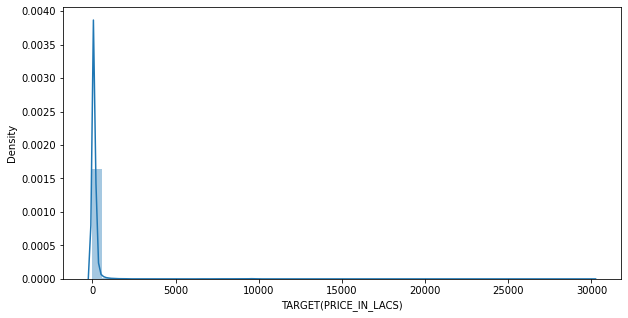

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(df['TARGET(PRICE_IN_LACS)'])

In [ ]:
df['TARGET(PRICE_IN_LACS)'].value_counts()

110.0     795
100.0     770
120.0     652
130.0     598
45.0      583
         ... 
96.6        1
95.6        1
8660.0      1
94.3        1
78.2        1
Name: TARGET(PRICE_IN_LACS), Length: 1172, dtype: int64

In [ ]:
len(df)*(0.03)

883.53

In [ ]:
# Remove the price outliers
df= df.sort_values('TARGET(PRICE_IN_LACS)',ascending=False).iloc[884:] 
df.describe()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
count,28567.000000,28567.000000,28567.000000,28567.000000,2.856700e+04,28567.000000,28567.000000,28567.000000,28567.000000
mean,0.653271,0.179298,0.315924,2.353450,1.542744e+03,0.933875,21.348115,76.926668,81.959182
std,0.518666,0.383608,0.464891,0.825286,2.666530e+04,0.248505,6.240020,10.457439,69.031482
min,0.000000,0.000000,0.000000,1.000000,3.000000e+00,0.000000,-37.713008,-121.761248,0.250000
25%,0.000000,0.000000,0.000000,2.000000,8.908686e+02,1.000000,18.438476,73.847780,37.000000
50%,1.000000,0.000000,0.000000,2.000000,1.156154e+03,1.000000,21.071623,77.338956,60.000000
75%,1.000000,0.000000,1.000000,3.000000,1.505131e+03,1.000000,26.900926,78.020000,100.000000
max,2.000000,1.000000,1.000000,20.000000,4.300000e+06,1.000000,59.912884,152.962676,420.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


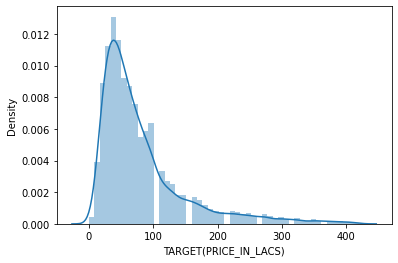

In [ ]:
sns.distplot(df['TARGET(PRICE_IN_LACS)'])

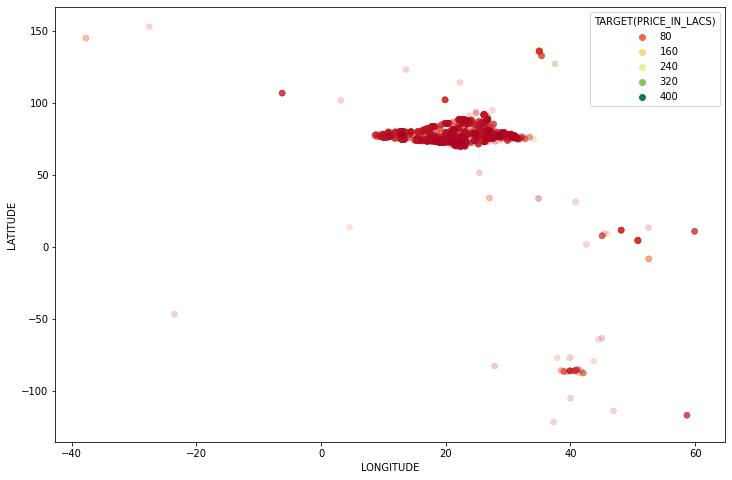

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='LONGITUDE',y='LATITUDE',data=df,hue='TARGET(PRICE_IN_LACS)', 
                palette = 'RdYlGn', edgecolor = None, alpha = 0.2)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


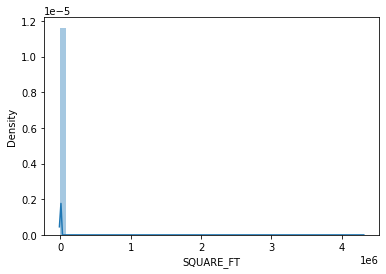

In [ ]:
sns.distplot(df['SQUARE_FT'])

In [ ]:
len(df)*(0.03)

857.01

In [ ]:
# Cleaning the sqaure_ft outliers
df = df.sort_values('SQUARE_FT',ascending=False).iloc[852:]
df.describe()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
count,27715.000000,27715.000000,27715.000000,27715.000000,27715.000000,27715.000000,27715.000000,27715.000000,27715.000000
mean,0.649396,0.180263,0.315136,2.304673,1197.120600,0.934187,21.309430,76.924631,77.612777
std,0.520011,0.384414,0.464578,0.749139,465.185990,0.247959,6.208328,10.452539,62.884893
min,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,-37.713008,-121.761248,0.250000
25%,0.000000,0.000000,0.000000,2.000000,876.111989,1.000000,18.441921,73.823649,36.000000
50%,1.000000,0.000000,0.000000,2.000000,1149.131767,1.000000,21.000000,77.338956,59.000000
75%,1.000000,0.000000,1.000000,3.000000,1470.155837,1.000000,26.900926,78.067294,95.000000
max,2.000000,1.000000,1.000000,20.000000,2713.090662,1.000000,59.912884,152.962676,420.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


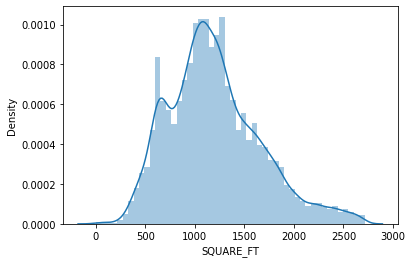

In [ ]:
sns.distplot(df['SQUARE_FT'])

In [ ]:
X_train = df.drop('TARGET(PRICE_IN_LACS)',axis=1).values
Y_train = df['TARGET(PRICE_IN_LACS)'].values

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_train,Y_train,test_size=0.1,random_state=42)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train.shape

(24943, 8)

In [ ]:
X_test.shape

(2772, 8)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()

In [ ]:
model.add(Dense(16,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(16,activation='relu'))

model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [ ]:
model.fit(x=X_train,y=Y_train,
          validation_data=(X_test,Y_test),batch_size=128,epochs=100)

Epoch 1/100
195/195 [==============================] - 1s 2ms/step - loss: 7246.4414 - val_loss: 3531.6804
Epoch 2/100
195/195 [==============================] - 0s 2ms/step - loss: 3453.3491 - val_loss: 3303.5410
Epoch 3/100
195/195 [==============================] - 0s 2ms/step - loss: 3211.6130 - val_loss: 3088.7068
Epoch 4/100
195/195 [==============================] - 0s 2ms/step - loss: 3033.2832 - val_loss: 2957.1455
Epoch 5/100
195/195 [==============================] - 0s 2ms/step - loss: 2962.2336 - val_loss: 2890.0466
Epoch 6/100
195/195 [==============================] - 0s 2ms/step - loss: 2914.4814 - val_loss: 2856.2927
Epoch 7/100
195/195 [==============================] - 0s 2ms/step - loss: 2893.1494 - val_loss: 2846.4634
Epoch 8/100
195/195 [==============================] - 0s 2ms/step - loss: 2873.2957 - val_loss: 2846.0085
Epoch 9/100
195/195 [==============================] - 0s 2ms/step - loss: 2861.0125 - val_loss: 2800.3516
Epoch 10/100
195/195 [===============

In [ ]:
losses = pd.DataFrame(model.history.history)
losses.plot()  